# Funciones

In [1]:
import numpy as np
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt
from IPython.display import Audio
from IPython.display import display
import sympy as sy
sy.init_printing()  # LaTeX like pretty printing for IPython

In [2]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

def show_bode_band(w, h, title, fi=0, ff=0, vertical=[], horizontal=[-50]):
    if ff == 0:
        ff = w[-1]
    wi_index = find_nearest(w, fi)
    wf_index = find_nearest(w, ff)
    w = w[wi_index:wf_index]
    h = h[wi_index:wf_index]
    fig, ax = plt.subplots(figsize=(12,9))
    # Calcule magnitud
    magnitude = 20 * np.log10(np.abs(h))
    ax.plot(w, magnitude, 'r') # Plotear magnitud
    ax.set_ylabel('Magnitude [dB]', color='r')
    ax.set_xlabel('Frequencia [rad/sample]')
    for i in vertical:
        plt.axvline(x=i, linestyle='dashed')
    for i in horizontal:
        plt.axhline(y=i, linestyle='dashed')
    #ax.set_ylim([-100, 100])
    ax2 = ax.twinx() # Para que magnitud y fase compartan gráfico
    
    # Calcule angulo
    # Si tiene problemas para graficar el ángulo, recuerde la función unwrap
    phase = np.unwrap(np.angle(h))
    ax2.plot(w, phase, 'b') # Plotear fase
    ax2.set_ylabel('Phase (radians)', color='b')
    ax2.axis('tight')
    
def show_bode(w, h, title):
    fig, ax = plt.subplots(figsize=(12,9))
    # Calcule magnitud
    magnitude = 20 * np.log10(np.abs(h))
    ax.plot(w, magnitude, 'r') # Plotear magnitud
    ax.set_ylabel('Magnitude [dB]', color='r')
    ax.set_xlabel('Frequencia [rad/sample]')
    plt.axhline(y=-50, linestyle='dashed')
    #ax.set_ylim([-100, 100])
    ax2 = ax.twinx() # Para que magnitud y fase compartan gráfico
    
    # Calcule angulo
    # Si tiene problemas para graficar el ángulo, recuerde la función unwrap
    phase = np.unwrap(np.angle(h))
    ax2.plot(w, phase, 'b') # Plotear fase
    ax2.set_ylabel('Phase (radians)', color='b')
    ax2.axis('tight')

def show_bode_and_zp(w, h, z, p, title):
    # En el primer gráfico, debe ir magnitud y fase. En el segundo, el diagrama de polos y ceros.
    # puede hacer dos funciones distintas para cada gráfico.
    
    fig, ax = plt.subplots(1, 2, figsize=(12,9))
    
    # Calcule magnitud
    magnitude = 20 * np.log10(np.abs(h))
    ax[0].plot(w, magnitude, 'r') # Plotear magnitud
    ax[0].set_ylabel('Magnitude [dB]', color='r')
    ax[0].set_xlabel('Frequencia [rad/sample]')
    #ax[0].set_ylim([-100, 100])
    ax2 = ax[0].twinx() # Para que magnitud y fase compartan gráfico
    
    # Calcule angulo
    # Si tiene problemas para graficar el ángulo, recuerde la función unwrap
    phase = np.unwrap(np.angle(h))
    ax2.plot(w, phase, 'b') # Plotear fase
    ax2.set_ylabel('Phase (radians)', color='b')
    ax2.axis('tight')
    
    # Diagrama de polos y ceros
    # Qué función le conviene usar? Plot? Scatter? 
    ax[1].scatter(np.real(z), np.imag(z), marker='o', color='b', label='Ceros')
    ax[1].scatter(np.real(p), np.imag(p), marker='x', color='r', label='Polos')
    ax[1].add_artist(plt.Circle((0, 0), 1, color = 'k', fill = False)) # Ayudita para graficar el circulo unitario
    ax[1].grid(True)
    
    # Puede hacer una combinación de condicionales para ajustar el tamaño del grafico en el caso de que los puntos esten
    # fuera del círculo unitario.
    xlim_p = np.max(np.concatenate((np.real(z), np.real(p), [1]), axis=0)) + 0.1
    xlim_n = np.min(np.concatenate((np.real(z), np.real(p), [-1]), axis=0)) - 0.1
    ylim = np.max(np.concatenate((np.imag(z), np.imag(p), [1]), axis=0)) + 0.1
    
    ax[1].set_xlim(xlim_n, xlim_p)
    ax[1].set_ylim(-ylim, ylim)
    ax[1].set_xlabel('Real')
    ax[1].set_ylabel('Imag')
    ax[1].set_title('Diagrama de polos y ceros')
    ax[1].legend(loc='upper right')
    
    fig.tight_layout(pad=3.0)
    
    plt.suptitle(title)
    plt.show()

def show_impulse_response(ti, yi):
    plt.step(ti, np.squeeze(yi))
    plt.xlabel('n [samples]')
    plt.ylabel('Amplitude')
    plt.title('Respuesta al impulso')

def show_polos_ceros(z, p):
    # Diagrama de polos y ceros
    # Qué función le conviene usar? Plot? Scatter? 
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(np.real(z), np.imag(z), marker='o', color='b', label='Ceros')
    ax.scatter(np.real(p), np.imag(p), marker='x', color='r', label='Polos')
    ax.add_artist(plt.Circle((0, 0), 1, color = 'k', fill = False)) # Ayudita para graficar el circulo unitario
    ax.grid(True)
    
    # Puede hacer una combinación de condicionales para ajustar el tamaño del grafico en el caso de que los puntos esten
    # fuera del círculo unitario.
    xlim_p = np.max(np.concatenate((np.real(z), np.real(p), [1]), axis=0)) + 0.1
    xlim_n = np.min(np.concatenate((np.real(z), np.real(p), [-1]), axis=0)) - 0.1
    ylim = np.max(np.concatenate((np.imag(z), np.imag(p), [1]), axis=0)) + 0.1
    
    plt.xlim(xlim_n, xlim_p)
    plt.ylim(-ylim, ylim)
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.title('Diagrama de polos y ceros')
    plt.legend(loc='upper right')
    
def show_group_delay(w, gd):
    plt.title('Digital filter group delay')
    plt.plot(w, gd)
    plt.ylabel('Group delay [samples]')
    plt.xlabel('Frequency [rad/sample]')
    
def show_bode_zp_ir_gd(w, h, z, p, ti, yi, gd, title):
    # En el primer gráfico, debe ir magnitud y fase. En el segundo, el diagrama de polos y ceros.
    # puede hacer dos funciones distintas para cada gráfico.
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 9))
    
    # Calcule magnitud
    magnitude = 20 * np.log10(np.abs(h))
    ax[0,0].plot(w, magnitude, 'r') # Plotear magnitud
    ax[0,0].set_ylabel('Magnitude [dB]', color='r')
    ax[0,0].set_xlabel('Frequencia [rad/sample]')
    #ax[0,0].set_ylim([-100, 100])
    ax[0,0].set_title('Diagrama de Bode')
    ax2 = ax[0,0].twinx() # Para que magnitud y fase compartan gráfico
    
    # Calcule angulo
    # Si tiene problemas para graficar el ángulo, recuerde la función unwrap
    phase = np.unwrap(np.angle(h))
    ax2.plot(w, phase, 'b') # Plotear fase
    ax2.set_ylabel('Phase (radians)', color='b')
    ax2.axis('tight')
    
    # Diagrama de polos y ceros
    # Qué función le conviene usar? Plot? Scatter? 
    ax[0,1].scatter(np.real(z), np.imag(z), marker='o', color='b', label='Ceros')
    ax[0,1].scatter(np.real(p), np.imag(p), marker='x', color='r', label='Polos')
    ax[0,1].add_artist(plt.Circle((0, 0), 1, color = 'k', fill = False)) # Ayudita para graficar el circulo unitario
    ax[0,1].grid(True)
    
    # Puede hacer una combinación de condicionales para ajustar el tamaño del grafico en el caso de que los puntos esten
    # fuera del círculo unitario.
    xlim_p = np.max(np.concatenate((np.real(z), np.real(p), [1]), axis=0)) + 0.1
    xlim_n = np.min(np.concatenate((np.real(z), np.real(p), [-1]), axis=0)) - 0.1
    ylim = np.max(np.concatenate((np.imag(z), np.imag(p), [1]), axis=0)) + 0.1
    
    ax[0,1].set_xlim(xlim_n, xlim_p)
    ax[0,1].set_ylim(-ylim, ylim)
    ax[0,1].set_xlabel('Real')
    ax[0,1].set_ylabel('Imag')
    ax[0,1].set_title('Diagrama de polos y ceros')
    ax[0,1].legend(loc='upper right')
    
    ## Graficamos la respuesta al impulso
    ax[1,0].step(ti, np.squeeze(yi))
    ax[1,0].grid()
    ax[1,0].set_xlabel('n [samples]')
    ax[1,0].set_ylabel('Amplitude')
    ax[1,0].set_title('Respuesta al impulso')

    ## Graficamos el group delay
    ax[1,1].set_title('Digital filter group delay')
    ax[1,1].plot(w, gd)
    ax[1,1].set_ylabel('Group delay [samples]')
    ax[1,1].set_xlabel('Frequency [rad/sample]')
    
    fig.tight_layout(pad=3.0)
    
    plt.suptitle(title)

def plot_all(B, A, Fs, title, N=None, show='All', fi=0, ff=0, vertical=[], horizontal=[]):
    if N is None:
        N = len(B)
    w, h = signal.freqz(B, A, fs=Fs)
    𝚣, 𝚙, 𝚔 = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚝𝚏𝟸𝚣𝚙𝚔(B, A)
    w, gd = signal.group_delay((B, A), fs=Fs)
    ti, yi = signal.dimpulse((B, A, Fs), n=N)
    if show=='All':
        show_bode_zp_ir_gd(w, h, z, p, ti, yi, gd, title)
    elif show=='bode':
        show_bode_band(w, h, title, fi=fi, ff=ff, vertical=vertical, horizontal=horizontal)
    elif show=='impulse':
        show_impulse_response(ti, yi)
    elif show=='zyp':
        show_polos_ceros(z, p)
    elif show=='group_delay':
        show_group_delay(w, gd)

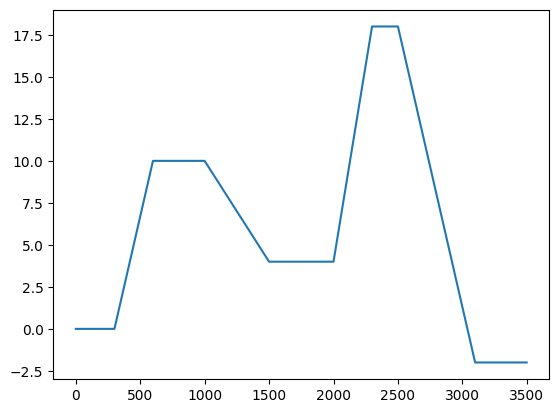

In [5]:
t_total = 35

t = np.linspace(0, t_total, t_total*100)

def get_rampa(t_init, t_change, delta_v, t_total):
    return np.pad(np.linspace(0, delta_v, t_change*100),(t_init*100, t_total*100-t_init*100-t_change*100), 'constant', constant_values=(0,delta_v))

ramp1 = get_rampa(3, 3, 10, t_total)
ramp2 = get_rampa(10, 5, -6, t_total)
ramp3 = get_rampa(20, 3, 14, t_total)
ramp4 = get_rampa(25, 6, -20, t_total)

ref = ramp1 + ramp2 + ramp3 + ramp4

plt.plot(ref)
plt.show()

# FIR
- firwin
    - hamming
    - hann
    - blackman
    - bartlett
    - rectangular
- remez (equiripple)

### Firwin

#### hamming

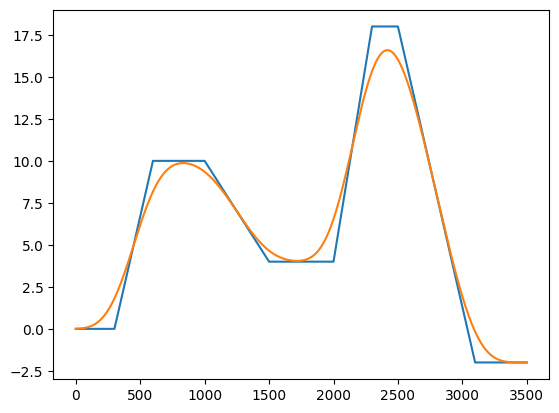

In [14]:
Fs = 100
fp = 0.1
fs = 0.15
fc = (fp+fs)/2
n  = 900

flt = signal.firwin(numtaps=n, cutoff=fc, window="hamming", pass_zero="lowpass", fs=Fs)
A = [1] +  [0 for i in range(n-1)]

w, gd = signal.group_delay((flt, A), fs=Fs)
ref_filtrada_hamming = signal.lfilter(flt, A, np.pad(ref, (0, int(gd[0])), 'constant', constant_values=(0, ref[-1])))[int(gd[0]):]

plt.plot(ref)
plt.plot(ref_filtrada_hamming)
plt.show()

#### hann

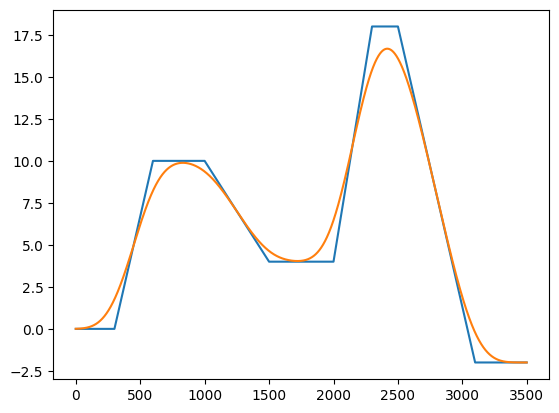

In [15]:
Fs = 100
fp = 0.1
fs = 0.15
fc = (fp+fs)/2
n  = 900

flt = signal.firwin(numtaps=n, cutoff=fc, window="hann", pass_zero="lowpass", fs=Fs)
A = [1] +  [0 for i in range(n-1)]

w, gd = signal.group_delay((flt, A), fs=Fs)
ref_filtrada_hann = signal.lfilter(flt, A, np.pad(ref, (0, int(gd[0])), 'constant', constant_values=(0, ref[-1])))[int(gd[0]):]

plt.plot(ref)
plt.plot(ref_filtrada_hann)
plt.show()

#### blackman

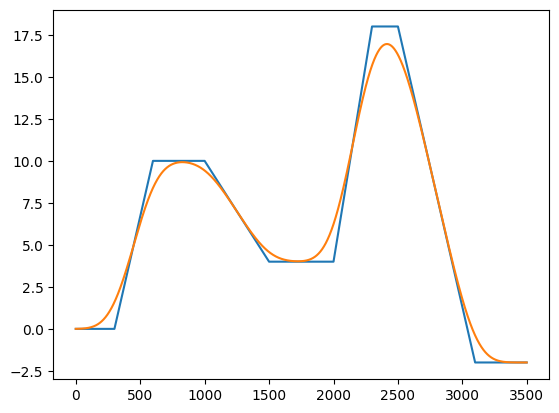

In [17]:
Fs = 100
fp = 0.1
fs = 0.15
fc = (fp+fs)/2
n  = 900

flt = signal.firwin(numtaps=n, cutoff=fc, window="blackman", pass_zero="lowpass", fs=Fs)
A = [1] +  [0 for i in range(n-1)]

w, gd = signal.group_delay((flt, A), fs=Fs)
ref_filtrada_blackman = signal.lfilter(flt, A, np.pad(ref, (0, int(gd[0])), 'constant', constant_values=(0, ref[-1])))[int(gd[0]):]

plt.plot(ref)
plt.plot(ref_filtrada_blackman)
plt.show()

#### bartlett

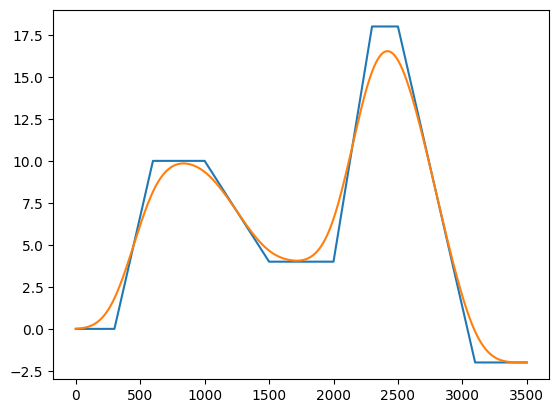

In [18]:
Fs = 100
fp = 0.1
fs = 0.15
fc = (fp+fs)/2
n  = 900

flt = signal.firwin(numtaps=n, cutoff=fc, window="bartlett", pass_zero="lowpass", fs=Fs)
A = [1] +  [0 for i in range(n-1)]

w, gd = signal.group_delay((flt, A), fs=Fs)
ref_filtrada_bartlett = signal.lfilter(flt, A, np.pad(ref, (0, int(gd[0])), 'constant', constant_values=(0, ref[-1])))[int(gd[0]):]

plt.plot(ref)
plt.plot(ref_filtrada_bartlett)
plt.show()

#### rect

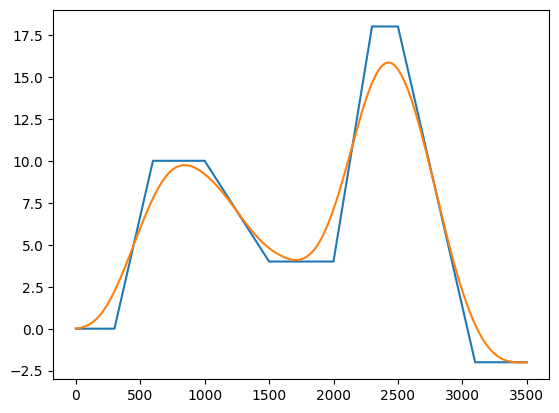

In [19]:
Fs = 100
fp = 0.1
fs = 0.15
fc = (fp+fs)/2
n  = 900

flt = signal.firwin(numtaps=n, cutoff=fc, window="boxcar", pass_zero="lowpass", fs=Fs)
A = [1] +  [0 for i in range(n-1)]

w, gd = signal.group_delay((flt, A), fs=Fs)
ref_filtrada_rect = signal.lfilter(flt, A, np.pad(ref, (0, int(gd[0])), 'constant', constant_values=(0, ref[-1])))[int(gd[0]):]

plt.plot(ref)
plt.plot(ref_filtrada_rect)
plt.show()

#### Comparison

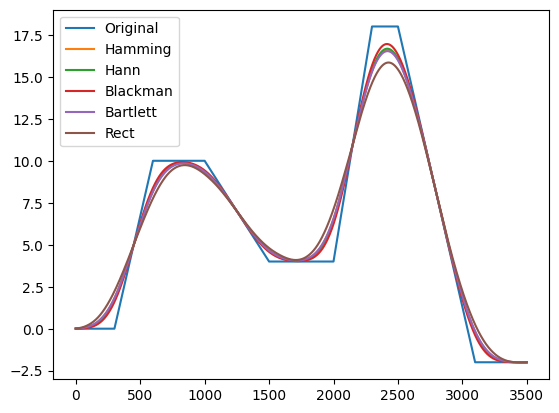

In [26]:
plt.plot(ref, label="Original")
plt.plot(ref_filtrada_hamming, label="Hamming")
plt.plot(ref_filtrada_hann, label="Hann")
plt.plot(ref_filtrada_blackman, label="Blackman")
plt.plot(ref_filtrada_bartlett, label="Bartlett")
plt.plot(ref_filtrada_rect, label="Rect")
plt.legend()
plt.show()

### Remez

1656
1657


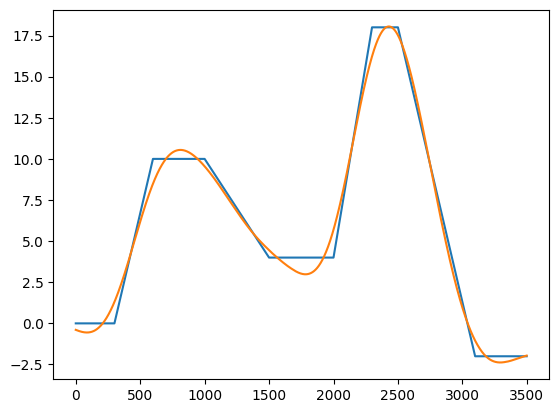

In [36]:
Fs = 100
Ap = 1
As = 50
fp = 0.1
fs = 0.2

delta_p = (10**(Ap/20)-1)/(10**(Ap/20)+1)
delta_s = (1+delta_p)/(10**(As/20))

n = int(np.ceil((-20*np.log10(np.sqrt(delta_p*delta_s))-13)/(2.324*((fs-fp)/Fs)*2*np.pi)+1))
print(n)
if not n%2:
    n+=1
    
print(n)


flt = signal.remez(n, [0, fp, fs, 0.5*Fs], [1, 0], fs=Fs)
A = [1] +  [0 for i in range(n-1)]

w, gd = signal.group_delay((flt, A), fs=Fs)
ref_filtrada_remez = signal.lfilter(flt, A, np.pad(ref, (0, int(gd[0])), 'constant', constant_values=(0, ref[-1])))[int(gd[0]):]

plt.plot(ref)
plt.plot(ref_filtrada_remez)
plt.show()

# IIR
- Butterworth
- Chebyshev (I y II)
- Elíptico

### Butterworth

3
254.12329495853294


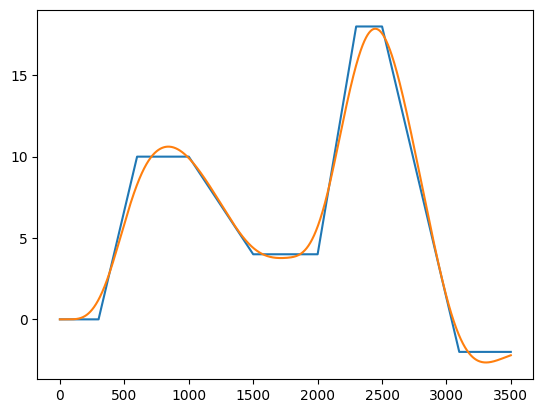

In [56]:
Fs = 100
Ap = 1
As = 50
fp = 0.1
fs = 2

N, Wn = signal.buttord(fp, fs, Ap, As, fs=Fs)
print(N)
B, A = signal.butter(N, Wn, btype='low', fs=Fs)

w, gd = signal.group_delay((B, A), fs=Fs)
ref_filtrada_butterworth = signal.lfilter(B, A, np.pad(ref, (0, int(gd[0])), 'constant', constant_values=(0, ref[-1])))[int(gd[0]):]
print(gd[0])

plt.plot(ref)
plt.plot(ref_filtrada_butterworth)
plt.show()

### Chebyshev

#### Cheby 1

2
158.46497341036022


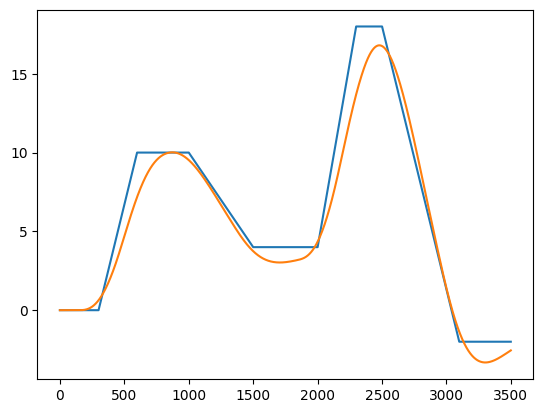

In [55]:
Fs = 100
Ap = 1
As = 50
fp = 0.1
fs = 2
rp = 1

n, wn = signal.cheb1ord(fp, fs, Ap, As, fs=Fs)
print(n)
B, A  = signal.cheby1(n, rp, wn, 'low', fs=Fs)

w, gd = signal.group_delay((B, A), fs=Fs)
ref_filtrada_cheby1 = signal.lfilter(B, A, np.pad(ref, (0, int(gd[0])), 'constant', constant_values=(0, ref[-1])))[int(gd[0]):]
print(gd[0])

plt.plot(ref)
plt.plot(ref_filtrada_cheby1)
plt.show()

#### Cheby 2

3
19.226374654627826


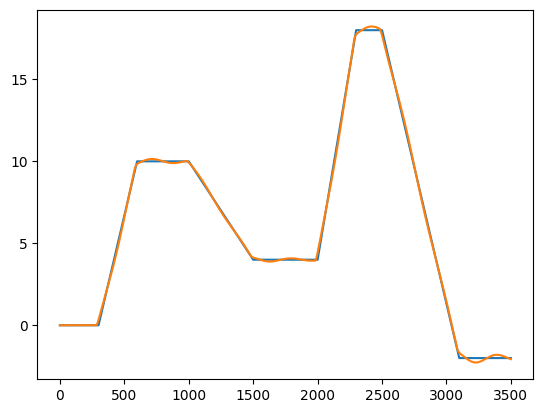

In [63]:
Fs = 100
Ap = 1
As = 50
fp = 0.05
fs = 0.4
rp = 1

n, wn = signal.cheb2ord(fp, fs, Ap, As, fs=Fs)
print(n)
B, A  = signal.cheby2(n, rp, wn, 'low', fs=Fs)

w, gd = signal.group_delay((B, A), fs=Fs)
ref_filtrada_cheby2 = signal.lfilter(B, A, np.pad(ref, (0, int(gd[0])), 'constant', constant_values=(0, ref[-1])))[int(gd[0]):]
print(gd[0])

plt.plot(ref)
plt.plot(ref_filtrada_cheby2)
plt.show()

### Elíptico

3
389.1968097876548


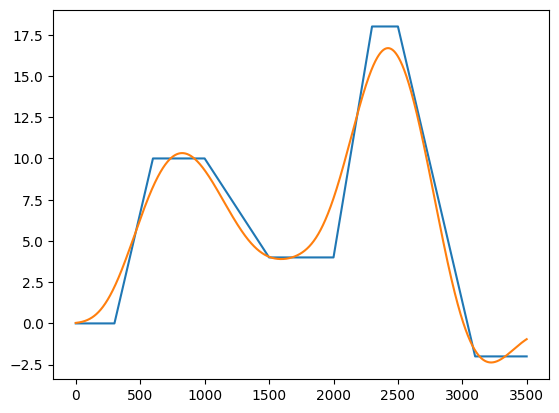

In [73]:
Fs = 100
Ap = 1
As = 50
fp = 0.1
fs = 0.4
rp = 1

n, wn = signal.ellipord(fp, fs, Ap, As, fs=Fs)
print(n)
B, A  = signal.ellip(n, Ap, As, wn, 'low', fs=Fs)

w, gd = signal.group_delay((B, A), fs=Fs)
ref_filtrada_ellip = signal.lfilter(B, A, np.pad(ref, (0, int(gd[0])), 'constant', constant_values=(0, ref[-1])))[int(gd[0]):]
print(gd[0])

plt.plot(ref)
plt.plot(ref_filtrada_ellip)
plt.show()